# AUTORES: Byron Iñacasha e Isaac Reyes
## Workshp
### ***SVM: Text Classification***

### Description: Given a dataset of text reviews (e.g., movie reviews), students must classify them as positive or negative using the Support Vector Machine (SVM) algorithm.

**• Evaluation Criteria:**
- Proper text preprocessin (tokenization, removal of stop words,
stemming/lemmatization).
-Conversion of text data into numerical format (e.g., TF-IDF, word embeddings).
-Implementation of the SVM algorithm.
-Evaluation of the model using accuracy, precision, recall, or F1-score.
-Visualization of the decision boundary (if possible).

*• Tasks:*

1. Data Preprocessing

2. Model Building

3. Model Evaluation

4. Visualization

1. Data Preprocessing


In [53]:
#Primero importamos librerias necesarias:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk
from sklearn.decomposition import PCA

In [54]:
#cargamos el dataset:
df= pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [55]:
df_positive = df[df['sentiment']=='positive'][:9000]
df_negative = df[df['sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])

a. Tokenizacion:
Convertimos en tokens

In [56]:
# Tokenizacion: convierte en tokens - Lemmatizacion
#Removal of Stop Words: the, etc.
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
#tokens = word_tokenize("This is an example sentence.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
#filtered_tokens = [i for i in tokens if not i in stop_words]
#filtered_tokens = [word for word in tokens if word.lower() not in stop_words]


In [59]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed = [stemmer.stem(token) for token in filtered_tokens]
#lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens]

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([' '.join(lemmatized)])

In [61]:
def preprocess_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [i for i in tokens if not i.lower() in stop_words]
    lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return ' '.join(lemmatized)

df['processed_review'] = df['review'].apply(preprocess_text)

2. Model Building

In [63]:
#convertir a formato numerico
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_review'])
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [64]:
#separamos la data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
#entrenamos el modelo
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

3. Model Evaluation

In [66]:
#Evaluamos
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [67]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8966666666666666
Precision: 0.8918883841661259
Recall: 0.905521149031493
F1 Score: 0.8986530665620505


4. Visualization

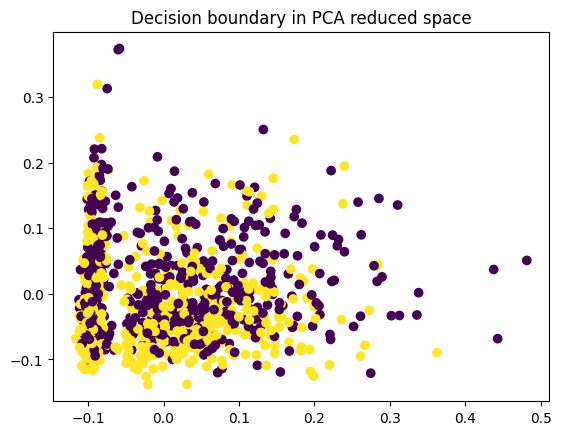

In [68]:
X_pca = PCA(n_components=2).fit_transform(X_test.toarray()[:1000])  #cogemos una muestra para ver
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred[:1000])
plt.title('Decision boundary in PCA reduced space')
plt.show()